## Question 2.11
In Sect. 2.7, an interpretation for a model with systematic component $μ = E[log(y)] = β_0 + β_1x$ was discussed.
1. Use a Taylor series expansion of $log(y)$ about $μ = E[y]$.
2. Find the expected value of both sides of this equation, and hence show that $E[log(y)] ≈ log(E[y]) = log(μ)$.
3. Using this information, show that an increase in the value of $x$ by $1$ is associated (approximately) with a change in $μ$ by a factor of $exp(β_1)$.


### Answer to 2.11, 1
***Use a Taylor series expansion of  $log(y)$  about  $μ=E[y]$.***

We already saw how to do Taylor expansion in the previous question.  So let's plug-and-chug.

NOTE that we'll use the natural log, so I'll give my answers in terms of $ln$ instead of $log$.

> $f(y) = ln(y) = f(\mu) + f'(\mu)(y - \mu) + f''(\mu)(y - \mu)^2 + ...$

> $= ln(\mu) + \frac{1}{\mu}(y - \mu) - \frac{1}{2\mu^2}(y - \mu)^2 + ...$

### Answer to 2.11, 2
***Find the expected value of both sides of this equation, and hence show that $E[log(y)] ≈ log(E[y]) = log(μ)$.***

We'll start by taking the expectation of each term.

> $E[ln(y)] = E[ln(\mu)] + E[\frac{1}{\mu}(y-\mu)] - E[\frac{1}{2\mu^2}(y-\mu)^2] + ...$

Since $\mu$ and $ln(\mu)$ are constants, we get

> $E[ln(y)] = ln(\mu) + \frac{1}{\mu}E[(y-\mu)] - \frac{1}{2\mu^2}E[(y-\mu)^2] + ...$

Interestingly, $E[(y-\mu)]=0$ and $E[(y-\mu)^2] = var(y)$ such that we're left with

> $E[ln(y)] = ln(\mu) - \frac{1}{2\mu^2}var(y) + ...$

In other words,

> $E[ln(y)] \approx ln(\mu)$

which is what we're meant to show.

### Answer to 2.11, 3
***Using this information, show that an increase in the value of $x$ by $1$ is associated (approximately) with a change in $μ$ by a factor of $exp(β_1)$.***

Given that $E[ln(y)] \approx ln(\mu) \approx \beta_0 + \beta_1x$, a 1-unit increase in $x$ causes a $\beta_1$ change to $ln(\mu)$.  But we're meant to show the change to $\mu$ (not $ln(\mu)$).

To do this, we can inverse the natural log by exponentiating both sides of the equation.

> $e^{(ln(\mu))} = \mu = e^{(\beta_0 + \beta_1x)} = e^{\beta_0} \times e^{\beta_1x}$

So a one-unit increase in $x$ **multiplicatively** increases $\mu$ by a factor of $e^{\beta_1}$.  For instance, take $\mu_0$ to be $\mu$ when $x=2$ such that $\mu_0 = e^{\beta_0} \times e^{2\beta_1}$.  Now take $\mu_1$ to be $\mu$ when $x=3$ such that $\mu_1 = e^{\beta_0} \times e^{3\beta_1}$.  Then $\frac{\mu_1}{\mu_0} = \frac{e^{\beta_0} \times e^{3\beta_1}}{e^{\beta_0} \times e^{2\beta_1}} = e^{\beta_1}$

## Question 2.12
Using R, produce a vector of 30 random numbers $y$ from a standard normal distribution (use `rnorm()`). Generate a second vector of 30 random numbers $x$ from a standard normal distribution. Find the P-value for testing if the explanatory variable $x$ is significantly related to $y$ using the regression model `lm(y ~ x)`.

Repeat the process a large number of times, say 1000 times. What proportion of the P-values are less than 5%? Less than 10%? What is the lesson?

### Answer
To execute this we'll run the model through a for-loop.

In [ ]:
pvalues <- numeric(length=1000)

for(i in 1:1000){
  x <- rnorm(30)
  y <- rnorm(30)

  m <- lm(y ~ 0+x)

  pvalues[i] <- summary(m)$coef[,4]
}

Here's the important thing to understand here.  We know that there is no relationship between `x` and `y` BECAUSE WE MADE THE DATA SUCH THAT THEY ARE INDEPENDENT.  Having said that, How many p-values should we expect to be $\le 0.05$? $\le 0.10$?

To answer, remember what p-values represent, the probability of our null distribution generating data like that which we found.  So we should ~5% of our p-values to be $\le 0.05$ and 10% of our pvalues to be $\le 0.10$.  

[1] 0.055

[1] 0.115

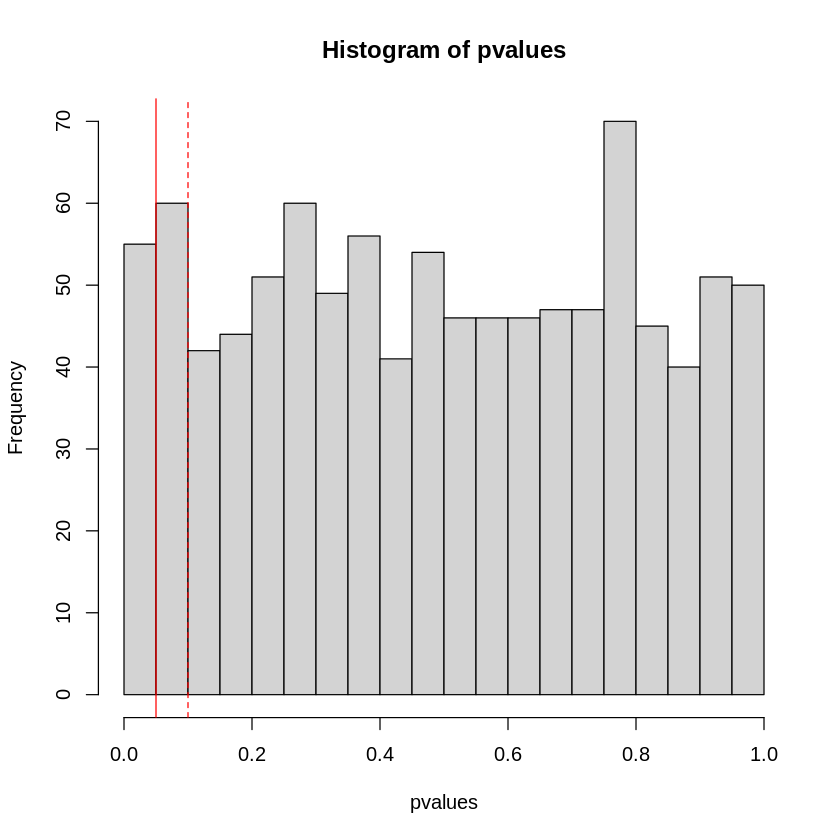

In [ ]:
hist(pvalues, breaks=20); abline(v=0.05, col="red"); abline(v=0.10, col="red", lty=2)

sum(pvalues < 0.05) / length(pvalues)
sum(pvalues < 0.10) / length(pvalues)

Indeed, this is what we find.  What's the lesson? I guess there's a few.  
1. For one null-hypothesis significance tests (NHST) do NOT test the experimental hypothesis but rather the null hypothesis.  
2. Rejected null hypotheses remain suspect.  To properly test a hypothesis, many controls must be in place, the result should be replicated several times, and test in several ways, and tested in different contexts (people, equipment, location, etc.).
3. A large number of NHSTs will lead to false rejections.

## Question 2.13
A study exposed sleeping people (males and females) of various ages to four different fire cues (a crackling noise, a shuffling noise, a flickering light, an unpleasant smell), and recorded the response time (in seconds) for the people to wake. Use the partially complete ANOVA table (Table 2.7) to answer the following questions.

1. Determine the degrees of freedom omitted from Table 2.7.
2. Determine how many observations were used in the analysis.
3. Find an unbiased estimate of $σ^2$.
4. Determine which explanatory variables are statistically significant for predicting response time, using sequential F-tests.
5. The analysed data are for participants who actually woke during the experiment; some failed to wake at all and were omitted from the analysis. Explain how this affects the interpretation of the results.
6. Compute the aic for the three nested models implied by Table 2.7. What model is suggested by the aic?
7. Compute the bic for the three nested models implied by Table 2.7. What model is suggested by the bic?
8. Compute $R^2$ and the adjusted $R^2$ for the three models implied by Table 2.7. What model is suggested by the $R^2$ and the adjusted $R^2$?
9. Compare the models suggested by the anova table, the aic, the bic, $R^2$ and the adjusted $R^2$. Comment.

\

**Table 2.7**

| Source of Variation | df | SS |
|---------------------|----|----|
| Cue | ? | 117,793|
| Sex | ? | 2,659 |
| Age | 3 | 22,850 |
| Residual | 60 | 177,639 |

### Answer to 2.13, 1
***Determine the degrees of freedom omitted from Table 2.7.***

We have 4 cues and 2 sexes.  Our basic equation for the degrees of freedom for a factor with $levels = l$ is $df = l-1$.  So here, $df_{cue} = 4-1=3$ and $df_{sex}=2-1=1$.

### Answer to 2.13, 2
***Determine how many observations were used in the analysis.***

Now that we have our total df, 67, we can take advantage of the fact that $df_{total} = n-1$.  Hence, the total number of observations was $n=df_{total}+1 = 67+1 = 68$.

### Answer to 2.13, 3
***Find an unbiased estimate of $σ^2$.***

Our unbiased estimate of the $\sigma^2$, the residual variance, is $\hat{\sigma}^2 = \frac{SS_{residual}}{df_{residual}} = \frac{1777639}{60} = 2960.65$

### Answer to 2.13, 4
***Determine which explanatory variables are statistically significant for predicting response time, using sequential F-tests.***

I don't really like this question.  The output of sequential F-tests varies with the sequence in which you test the factors; test $\text{Sex}$ first and you get one answer, test it second and get a different answer.  Without some information about how these variables relate, i.e., which should be controlled for when testing, there are too many possible tests from which to make sense.  So I'll just run calculate the F for each variable.

| Source of Variation | df | SS | MS | F | p |
|---------------------|----|----|----|---|---|
| Cue | 3 | 117,793 | 39,264.33 | 4.42 | 0.01 |
| Sex | 1 | 2,659 | 2,659 | 0.90 | 0.35 |
| Age | 3 | 22,850 | 7616.67 | 2.57 | 0.06 |
| Residual | 60 | 177,639 | 2,960.65 | NA | NA |

### Answer to 2.13, 5
***The analysed data are for participants who actually woke during the experiment; some failed to wake at all and were omitted from the analysis. Explain how this affects the interpretation of the results.***

At least, this limits the applicability of the findings; those that awoke may differ from those that did not.  We might call this a "bias".  Rather than speaking to something like the probabilities of certain outcomes, then, it can only speak to something like the *conditional* probabilities of certain outcomes; e.g., *conditional on waking up...*.

### Answer to 2.13, 6
***Compute the aic for the three nested models implied by Table 2.7. What model is suggested by the aic?***

To start, we should acknowledge that the book seemingly advocates ANOVA for comparing nested models but AIC/BIC for non-nested models.  However, as this question suggests, I don't think there is any reason that AIC cannot also be used for comparing nested models.

Equation 2.35 gives us the formula aic:

$$AIC = n \ \text{ln}(\text{RSS}/n) + 2p'$$

I think that the implied "three nested models" are $\text{(Cue)} < \text{(Cue + Sex)} < \text{(Cue + Sex + Age)}$.  Let's first find $\text{AIC}_{\text{(Cue+Sex+Age)}}$

$$\text{AIC}_{\text{(Cue+Sex+Age)}} = 68 \ \text{ln}\left(\frac{177,639}{68}\right) + 2(4) \approx 543$$
$$\text{AIC}_{\text{(Cue+Sex)}} = 68 \ \text{ln}\left(\frac{177,639 + 22,850}{68}\right) + 2(3) \approx 549$$
$$\text{AIC}_{\text{(Cue)}} = 68 \ \text{ln}\left(\frac{177,639 + 22,850 + 2,659}{68}\right) + 2(2) \approx 548$$
$$\text{AIC}_{\text{(intercept)}} = 68 \ \text{ln}\left(\frac{177,639 + 22,850 + 2,659 + 117,793}{68}\right) + 2(1) \approx 577$$

So the "intercept-only" model does the worst, but the other 3 models are pretty similar.

In [ ]:
68 * log(177639 / 68) + 8
68 * log((177639 + 22850) / 68) + 6
68 * log((177639 + 22850 + 2659) / 68) + 4
68 * log((177639 + 22850 + 2659 + 117793) / 68) + 2

[1] 543.0241

[1] 549.2525

[1] 548.1484

[1] 577.2463

### Answer to 2.13, 7
***Compute the bic for the three nested models implied by Table 2.7. What model is suggested by the bic?***

Recall that BIC is an alternative to AIC.  Its formula is given in Equation 2.36:

$$BIC = n \ \text{ln}(\text{RSS}/n) + p' \text{ln} \ n$$

$$BIC_{Cue + Sex + Age} = 68 \ \text{ln} \ \left(\frac{177,639}{68}\right) + 4 \ \text{ln}(68) \approx 552$$

$$BIC_{Cue + Sex} = 68 \ \text{ln} \ \left(\frac{177,639 + 22,850}{68}\right) + 3 \ \text{ln}(68) \approx 556$$

$$BIC_{Cue} = 68 \ \text{ln} \ \left(\frac{177,639 + 22,850 + 2,659}{68}\right) + 2 \ \text{ln}(68) \approx 553$$

$$BIC_{(intercept)} = 68 \ \text{ln} \ \left(\frac{177,639 + 22,850 + 2,659 + 117,793}{68}\right) + 1 \ \text{ln}(68) \approx 579$$

Once again, the models are pretty similar, but the "intercept-only" model seems appreciably worse than any of the others.  Technically, the $Cue + Sex + Age$ model is best.

In [ ]:
68 * log((177639) / 68) + 4*log(68)
68 * log((177639 + 22850) / 68) + 3*log(68)
68 * log((177639 + 22850 + 2659) / 68) + 2*log(68)
68 * log((177639 + 22850 + 2659 + 117793) / 68) + 1*log(68)

[1] 551.9021

[1] 555.911

[1] 552.5874

[1] 579.4658

### Answer to 2.13, 8
***Compute $R^2$ and the adjusted $R^2$ for the three models implied by Table 2.7. What model is suggested by the $R^2$ and the adjusted $\bar{R}^2$?***

Let's recall the equations for $R^2$ and $\bar{R}^2$; by equations (2.29) and (2.30):
$$R^2 = \frac{\text{ssReg}}{SST} = 1 - \frac{RSS}{SST}$$
\
$$\bar{R}^2 = 1 - \frac{RSS/(n-p')}{SST/(n-1)} = 1 - (1 - R^2) \frac{n-1}{n-p'}$$
\
\
$$R^2_{Cue+Sex+Age} = 1 - \frac{177,639}{177,639 + 22,850 + 2659 + 117,793} \approx 0.45$$
\
$$\bar{R}^2_{Cue+Sex+Age} = 1 - \frac{177,639 / (68 - 4)}{(177,639 + 22,850 + 2659 + 117,793) / (68 - 1)} \approx 0.42$$
\
\
$$R^2_{Cue+Sex} = 1 - \frac{177,639 + 117,793}{177,639 + 22,850 + 2659 + 117,793} \approx 0.08$$
\
$$\bar{R}^2_{Cue+Sex} = 1 - \frac{(177,639 + 117,793) / (68 - 3)}{(177,639 + 22,850 + 2659 + 117,793) / (68 - 1)} \approx 0.05$$
\
\
$$R^2_{Cue} = 1 - \frac{177,639 + 117,793 + 2659}{177,639 + 22,850 + 2659 + 117,793} \approx 0.07$$
\
$$\bar{R}^2_{Cue} = 1 - \frac{(177,639 + 117,793 + 2659) / (68 - 2)}{(177,639 + 22,850 + 2659 + 117,793) / (68 - 1)} \approx 0.06$$

Both metrics tell about the same: the full model is most explanatory and the others explain similar limited amounts of variance.

In [ ]:
1 - (177639)/ ((177639 + 22850 + 2659 + 117793))
1 - ((177639) / (68-4)) / ((177639 + 22850 + 2659 + 117793) / (68-1))

1 - (177639 + 117793)/ ((177639 + 22850 + 2659 + 117793))
1 - ((177639 + 117793) / (68-3)) / ((177639 + 22850 + 2659 + 117793) / (68-1))

1 - (177639 + 117793 + 2659)/ ((177639 + 22850 + 2659 + 117793))
1 - ((177639 + 117793 + 2659) / (68-2)) / ((177639 + 22850 + 2659 + 117793) / (68-1))

[1] 0.4465057

[1] 0.4205607

[1] 0.0794819

[1] 0.05115826

[1] 0.07119689

[1] 0.05712411

### Answer to 2.13, 9
***Compare the models suggested by the anova table, the aic, the bic, $R^2$ and the adjusted $R^2$. Comment.***

Across each model-comparison technique, the full model performed best.  However, the methods differed in their relative ranking of the remaining incomplete models: aic and bic show that the 3 models perform similarly well, while $R^2$ and $\bar{R}^2$ appear to suggest a large difference between the full model and either incomplete model.

## Question 2.14

Numerous studies have shown an association between seasonal ambient temperature (in ◦C) and blood pressure (in mm Hg). A study of 574 rural Ghanaian men aged between 18 and 65 studied this relationship [9] (and also included a number of extraneous variables) using a linear regression model, producing the results in Table 2.8.

**Table 2.8 The parameter estimates and the standard errors in the linear regression model for estimating the systolic blood pressure (in mm Hg) in Ghanaian men aged between 18 and 65 (Problem 2.14)**

|Explanatory variable|$\hat{\beta}_j$|se($\hat{\beta}_j$)|
|--------------------|---------------|-------------------|
|Constant|100.812|13.096|
|Age(in years|0.332|0.062|
|Waist circumference (in cm)|0.411|0.090|
|Alcohol (yes:1; no:0)|-3.003|1.758|
|Smoking (yes:1; no:0)|-0.362|2.732|
|Ambient temperature (in ◦C)|-0.521|0.262|


1. Compute the P-values for each term in the model, and comment.

2. After adjusting for age, waist circumference, alcohol consumption and smoking habits, describe the relationship between ambient temperature and systolic blood pressure.

3. Plot the line describing the relationship between ambient temperature and systolic blood pressure for 30-year-old men who do not smoke, do drink alcohol and have a waist circumference of 100 cm. The authors state that

>> Daily mean temperatures range between an average minimum of 20◦C in the rainy season and an average maximum of 40◦C in the dry season. In the dry season, early mornings are usually cool and the afternoons commonly hot with daily maximum temperatures going as high as 45◦C (p. 17).

>Use this information to guide your choice of temperature values for your plot.

4. Compute a 95% confidence interval for the regression parameter for ambient temperature.

5. Interpret the relationship between ambient temperature and all the variables in the regression equation.

6. Predict the mean systolic blood pressure for 35 year-old Ghanaian men (who do not smoke, do drink alcohol and have a waist circumference of 100 cm) when the ambient temperature is 30◦C.

### Answer to 2.14, 1
***Compute the P-values for each term in the model, and comment.***

To find the p-values for these $\hat{\beta}$ estimates, we'll find the T-statistics like
$$T = \frac{\hat{\beta} - \beta_0}{se(\hat{\beta})}$$;
if $H_0$ is true, then then $T \sim t(df=n-p', \mu=0, \sigma=se(\hat{\beta}))$, from which we estimate the p-value.

I'm going to start by loading our data into R so that the computer can do our calculations.

In [ ]:
d <- data.frame("Explanatory variable" = c("Constant", "Age", "Waist", "Alcohol", "Smoking", "Temp"),
                "beta" = c(100.812, 0.332, 0.411, -3.003, -0.362, -0.521),
                "se" = c(13.096, 0.062, 0.090, 1.758, 2.732, 0.262))

d

Explanatory.variable,beta,se
<chr>,<dbl>,<dbl>
Constant,100.812,13.096
Age,0.332,0.062
Waist,0.411,0.090
Alcohol,-3.003,1.758
Smoking,-0.362,2.732
Temp,-0.521,0.262


Now let's calulate the T-stat for each; I'm going to assume that $\beta_0 = 0$ in all cases.

In [ ]:
d$T.stat <- round(d$beta / d$se, 4)
d

Explanatory.variable,beta,se,T.stat
<chr>,<dbl>,<dbl>,<dbl>
Constant,100.812,13.096,7.6979
Age,0.332,0.062,5.3548
Waist,0.411,0.090,4.5667
Alcohol,-3.003,1.758,-1.7082
Smoking,-0.362,2.732,-0.1325
Temp,-0.521,0.262,-1.9885


We can just about calculate the p-values, but we the degrees of freedom.  Remember, this is $\nu = n-p'$.  Unfortunately, the question is a little vague.  We're told that $n=574$, and we're given 6 parameters; however, the question states that the analysis used "a number of extraneous variables".  I'm not sure if the "extraneous variables" are all those given to us, or if some were omitted from the table.  But I'll assume what we're given is the full set of variables; even if it wasn't, it's unlike to make much difference in our estimates.

In [ ]:
df <- 574 - 6

d$p.values <- round(2*(1-pt(abs(d$T.stat), df)),4)

d

Explanatory.variable,beta,se,T.stat,p.values
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Constant,100.812,13.096,7.6979,0.0000
Age,0.332,0.062,5.3548,0.0000
Waist,0.411,0.090,4.5667,0.0000
Alcohol,-3.003,1.758,-1.7082,0.0881
Smoking,-0.362,2.732,-0.1325,0.8946
Temp,-0.521,0.262,-1.9885,0.0472


### Answer to 2.14, 2
***After adjusting for age, waist circumference, alcohol consumption and smoking habits, describe the relationship between ambient temperature and systolic blood pressure.***

After accounting for other variables, systolic blood pressure is estimated to decrease by 0.521 mmHG for every 1 degree increase in ambient temperature.  The probability of the null distribution accounting for this relationship is 4.72%.

### Answer to 2.14, 3
***Plot the line describing the relationship between ambient temperature and systolic blood pressure for 30-year-old men who do not smoke, do drink alcohol and have a waist circumference of 100 cm. The authors state that***

>> ***Daily mean temperatures range between an average minimum of 20◦C in the rainy season and an average maximum of 40◦C in the dry season. In the dry season, early mornings are usually cool and the afternoons commonly hot with daily maximum temperatures going as high as 45◦C (p. 17).***

>***Use this information to guide your choice of temperature values for your plot.***

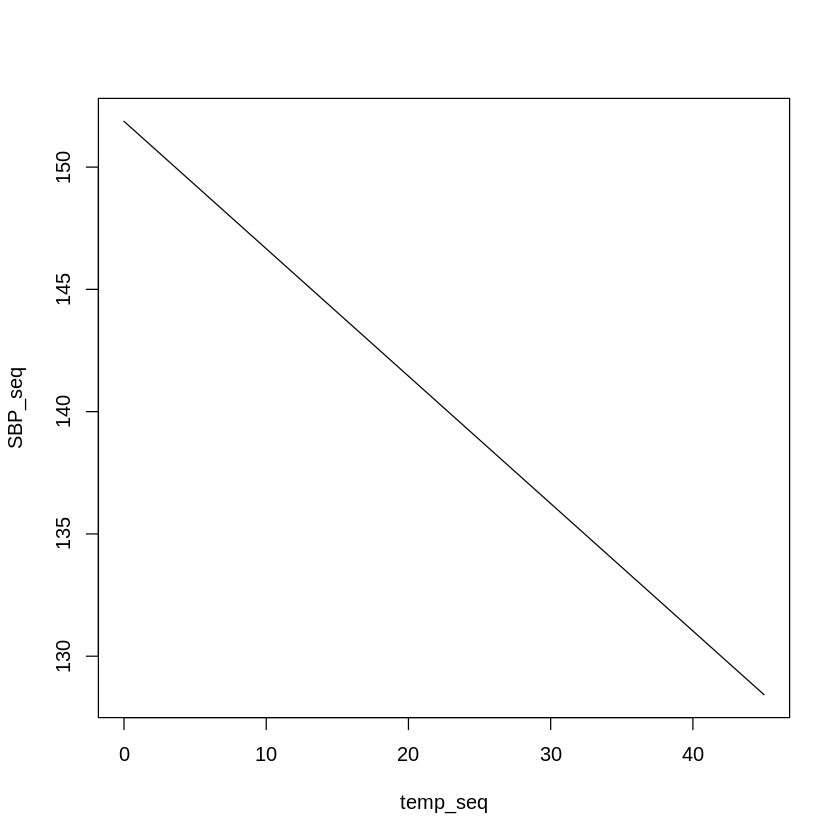

In [ ]:
# Start by assigning the case values
d$Case <- c(1, 30, 100, 0, 0, NA)
# Since we're trying to see the effect of temperature, define the set of temperatures
temp_seq <- seq(from=0, to=45, by=1)

# The SBP for each temperature is defined as the sum of products of each beta coef with its case value;
# since we're varying temperature, we add its contributions separate so we can use every value of temp_seq
SBP_seq <- (sum((d$beta * d$Case), na.rm=TRUE) + d[6, "beta"]*temp_seq)

plot(SBP_seq ~ temp_seq, type="l")

### Answer to 2.14, 4
***Compute a 95% confidence interval for the regression parameter for ambient temperature.***

In [ ]:
ci <- 0.95
a <- 1 - ci
a2 <- a/2
t_val <- qt(1-a2, df=df)

d$lo_ci <- round(d$beta - t_val*d$se, 2)
d$hi_ci <- round(d$beta + t_val*d$se, 2)

d

Explanatory.variable,beta,se,T.stat,p.values,Case,lo_ci,hi_ci
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Constant,100.812,13.096,7.6979,0.0000,1,75.09,126.53
Age,0.332,0.062,5.3548,0.0000,30,0.21,0.45
Waist,0.411,0.090,4.5667,0.0000,100,0.23,0.59
Alcohol,-3.003,1.758,-1.7082,0.0881,0,-6.46,0.45
Smoking,-0.362,2.732,-0.1325,0.8946,0,-5.73,5.00
Temp,-0.521,0.262,-1.9885,0.0472,NA,-1.04,-0.01


### Answer to 2.14, 5
***Interpret the relationship between ambient temperature and all the variables in the regression equation.***

I'm not sure if this question was the intended question: we're asked to interpret the relationships between one *predictor* variable (Temp) with all other predictor variables; I would've thought the question wanted the relationship with the *outcome* variable (blood pressure) will each predictor variable.  But let's take the question at face value.

**After accounting for the other predictor variables**, blood pressure decreases by 0.521 $\pm$ 0.262 mmHg for every $1°$ increase in ambient temperature.

I take the bolded bit to be addressing the question.

### Answer to 2.14, 6
***Predict the mean systolic blood pressure for 35 year-old Ghanaian men (who do not smoke, do drink alcohol and have a waist circumference of 100 cm) when the ambient temperature is 30◦C.***

This will be similar to part 3.  We'll just insert each of these values into our regression equation

$$BP = \beta_0 + \beta_{\text{age}}\text{Age} + ... + \beta_{\text{Temp}}\text{Temp}$$

In [ ]:
case2 <- c(1, # contant
           35, # age
           100, # waist circumference
           0, # alcohol
           0, # smoking
           30) # temperature

sum(case2 * d$beta)

[1] 137.902

## Question 2.15
An experiment was conducted [11] to determine how to maximize Mermaid meadowfoam flower production (Table 2.9; data set: flowers) for extraction as vegetable oil.

**Table 2.9** *The average number of flowers per meadowfoam plant (based on ten seedlings) exposed to various levels of lighting at two different times: at photoperiodic floral induction (PFI) or 24 days before PFI. These data are consistent with the results in [11]*

\

| Timing  | LI|       |       |       |       |       |       |
|---------|------------------------------------------------------------------|-------|-------|-------|-------|-------|-------|
|         | 150   | 300   | 450   | 600   | 750   | 900   |
| At PFI  | 62.4  | 77.1  | 55.7  | 54.2  | 49.5  | 62.0  | 39.3  | 45.3  | 30.9  | 45.2  | 36.8  | 42.2  |
| Before PFI | 77.7  | 75.4  | 68.9  | 78.2  | 57.2  | 70.9  | 62.9  | 52.1  | 60.2  | 45.6  | 52.5  | 44.1  |

*LI* stands for "Light intensity (in $\mu \text{mol} m^{-2} s^{-1}$)

\
1. Plot the average number of flowers produced per plant against the light intensity, distinguishing the two timings. Comment.
2. Suppose a model with the systematic component `Flowers ~ Light + Timing` was needed to model the data. What would such a systematic component imply about the relationship between the variables?
3. Suppose a model with the systematic component `Flowers ~ Light * Timing` was needed to model the data. What would such a systematic component imply about the relationship between the variables?
4. Fit the two linear regression models with the systematic components specified above. Which is the preferred model?
5. The fitted model should use all prior weights as $w_i = 10$ for all $i$. What difference does it make if the prior weights are not defined (which r interprets as $w_i = 1$ for all $i$)?
6. Plot the systematic component of the preferred regression model on the data.
7. Interpret the model.

*(This problem continues in Problem 3.13.)*

### Answers
Let's start by getting our data loaded.

In [ ]:
install.packages("GLMsData")
library(GLMsData)

data(flowers)
d <- flowers
str(d)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



'data.frame':	24 obs. of  3 variables:
 $ Flowers: num  62.4 77.1 77.7 75.4 55.7 54.2 68.9 78.2 49.5 62 ...
 $ Light  : int  150 150 150 150 300 300 300 300 450 450 ...
 $ Timing : Factor w/ 2 levels "Before","PFI": 2 2 1 1 2 2 1 1 2 2 ...


#### Answer to 2.15, 1
***Plot the average number of flowers produced per plant against the light intensity, distinguishing the two timings. Comment.***

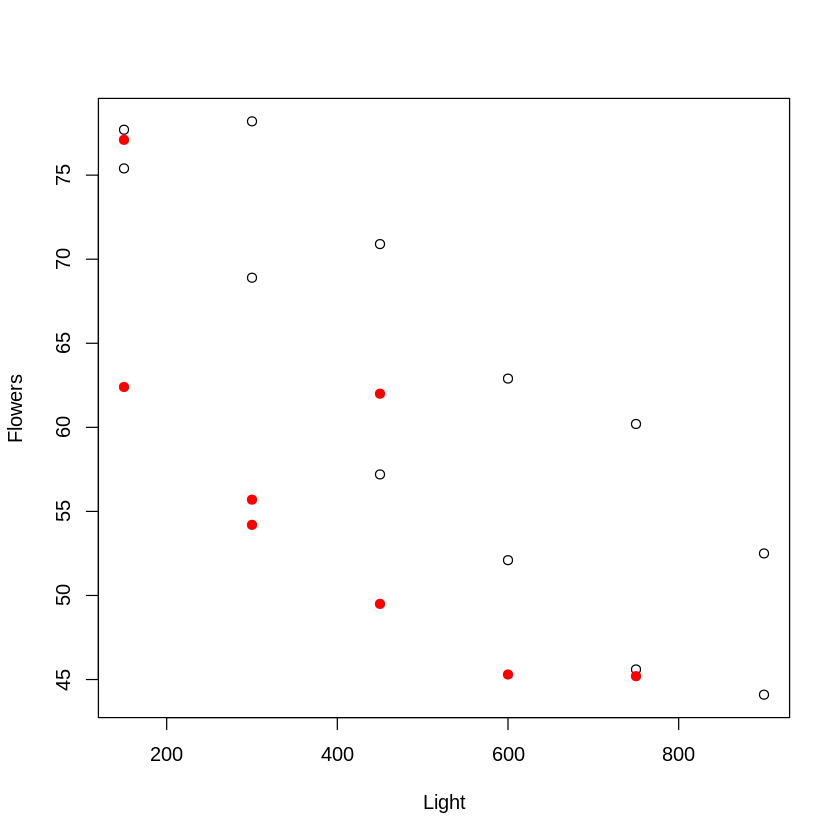

In [ ]:
plot(Flowers ~ Light, data=d[d$Timing=="Before",])
points(Flowers ~ Light, data=d[d$Timing=="PFI",], col="red", pch=19)

For both `Timing` conditions, `Flowers` decrease with more `Light`.  Fewer `Flowers` occur across all values of `Light` for the `Timing == 'PFI'` condition compared to the `Timing == "Before"` condition.

#### Answers to 2.15, 2 and 3
***2. Suppose a model with the systematic component `Flowers ~ Light + Timing` was needed to model the data. What would such a systematic component imply about the relationship between the variables?***

***3. Suppose a model with the systematic component `Flowers ~ Light * Timing` was needed to model the data. What would such a systematic component imply about the relationship between the variables?***

The model `Flowers ~ Light + Timing` would imply that the variable $Flowers$ is well modeled by the additive relations with $Light$ and $Timing$.

The model `Flowers ~ Light * Timing` can be a little misleading if you're not familiar with R notation.  You might think that this model translates to $Flowers$ being modeled as the interaction between $Light$ and $Timing$.  But in R, the `*` symbol implies both non-interaction relations and interactions like
$$Flowers = \alpha + \beta_L Light + \beta_T Timing + \beta_{LT} \times Light \times Timing$$
So this model implies that $Flowers$ can be well modeled by the additive relations with $Light$, $Timing$, and the interaction of $Light$ and $Timing$.

#### Answer to 2.15, 4
***Fit the two linear regression models with the systematic components specified above. Which is the preferred model?***

As a guess from looking at the plot in part 1, I think the first model (without interaction) will be preferred.  Why? Because the two timing conditions look to have the same slope but different intercepts--meaning that the interaction is unimportant.  But let's see.

In [ ]:
m1 <- lm(Flowers ~ Light + Timing, data=d)
m2 <- lm(Flowers ~ Light * Timing, data=d)

summary(m1)
summary(m2)

AIC(m1)
AIC(m2)


Call:
lm(formula = Flowers ~ Light + Timing, data = d)

Residuals:
    Min      1Q  Median      3Q     Max 
-10.040  -3.930  -1.819   5.587  11.866 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  83.399167   3.289525  25.353  < 2e-16 ***
Light        -0.040490   0.005157  -7.851 1.11e-07 ***
TimingPFI   -12.091667   2.642210  -4.576 0.000164 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.472 on 21 degrees of freedom
Multiple R-squared:  0.7973,	Adjusted R-squared:  0.778 
F-statistic: 41.29 on 2 and 21 DF,  p-value: 5.279e-08



Call:
lm(formula = Flowers ~ Light * Timing, data = d)

Residuals:
   Min     1Q Median     3Q    Max 
-9.919 -3.991 -1.698  5.446 11.664 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      83.116667   4.364515  19.044 2.75e-14 ***
Light            -0.039952   0.007471  -5.347 3.11e-05 ***
TimingPFI       -11.526667   6.172356  -1.867   0.0766 .  
Light:TimingPFI  -0.001076   0.010566  -0.102   0.9199    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.63 on 20 degrees of freedom
Multiple R-squared:  0.7974,	Adjusted R-squared:  0.767 
F-statistic: 26.24 on 3 and 20 DF,  p-value: 3.898e-07


[1] 162.5441

[1] 164.5316

Indeed, the interaction term in `m2` is basically 0 with a very high p-value--suggesting that it is unimportant.  Using `AIC`, `m1` is apparently preferred over `m2`.

#### Answer to 2.15, 5
***The fitted model should use all prior weights as $w_i = 10$ for all $i$. What difference does it make if the prior weights are not defined (which r interprets as $w_i = 1$ for all $i$)?***

Wha!? where are these "prior weights" coming from?  Well, you'd have to read the information file on the `flowers` data.frame()

In [ ]:
?flowers

It says: "`Flowers` the mean number of flowers per meadowfoam plant,
          averaged over ten seedlings; a numeric vector".

So let's run the `m1` regression with and without weights.

In [ ]:
m1w <- lm(Flowers ~ Light + Timing, data=d, weights = rep(10, nrow(d)))

summary(m1)
summary(m1w)


Call:
lm(formula = Flowers ~ Light + Timing, data = d)

Residuals:
    Min      1Q  Median      3Q     Max 
-10.040  -3.930  -1.819   5.587  11.866 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  83.399167   3.289525  25.353  < 2e-16 ***
Light        -0.040490   0.005157  -7.851 1.11e-07 ***
TimingPFI   -12.091667   2.642210  -4.576 0.000164 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.472 on 21 degrees of freedom
Multiple R-squared:  0.7973,	Adjusted R-squared:  0.778 
F-statistic: 41.29 on 2 and 21 DF,  p-value: 5.279e-08



Call:
lm(formula = Flowers ~ Light + Timing, data = d, weights = rep(10, 
    nrow(d)))

Residuals:
    Min      1Q  Median      3Q     Max 
-31.748 -12.428  -5.753  17.668  37.524 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  83.399167   3.289525  25.353  < 2e-16 ***
Light        -0.040490   0.005157  -7.851 1.11e-07 ***
TimingPFI   -12.091667   2.642210  -4.576 0.000164 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 20.47 on 21 degrees of freedom
Multiple R-squared:  0.7973,	Adjusted R-squared:  0.778 
F-statistic: 41.29 on 2 and 21 DF,  p-value: 5.279e-08


No differences.

#### Answer to 2.15, 6
***Plot the systematic component of the preferred regression model on the data.***

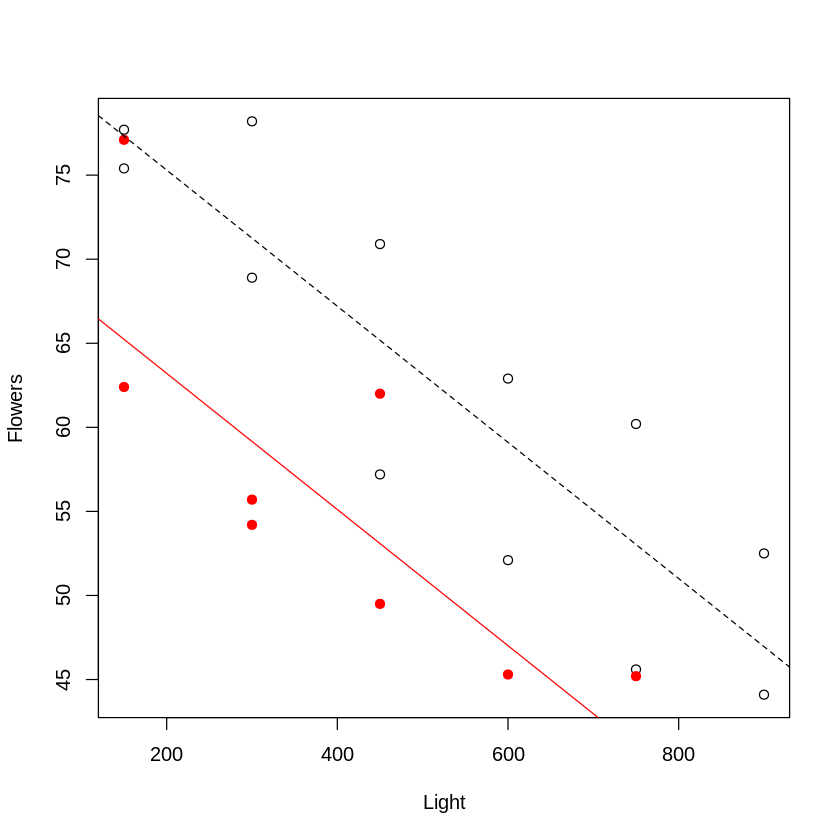

In [ ]:
plot(Flowers ~ Light, data=d[d$Timing=="Before",])
points(Flowers ~ Light, data=d[d$Timing=="PFI",], col="red", pch=19)
abline(coef(m1)[1], coef(m1)[2], lty=2, col="black")
abline(sum(coef(m1)[c(1, 3)]), coef(m1)[2], lty=1, col="red")

#### Answer to 2.15, 7
***Interpret the model.***

Under either lighting condition, `Flowers` decreases with `Light` at approximately the same rate.  `Timing` also affect `Flowers`; `Timing == "RFI` generally suppresses `Flowers` compared to `Before`.

## Question 2.16

A study of babies [1] hypothesized that babies would take longer to learn to crawl in colder months because the extra clothing restricts their movement. From 1988–1991, the babies’ first crawling age and the average monthly temperature six months after birth (when “infants presumably enter the window of locomotor readiness”; p. 72) were recorded. The parents reported the birth month, and age when their baby first crept or crawled a distance of four feet in one minute. Data were collected at the University of Denver Infant Study Center on 208 boys and 206 girls, and summarized by the birth month (Table 2.10; data set: `crawl`).

1. Plot the data. Which assumptions, if any, appear to be violated?
2. Explain why a weighted regression model is appropriate for the data.
3. Fit a weighted linear regression model to the data, and interpret the regression coefficients.
4. Formally test the hypothesis proposed by the researchers.
5. Find a 90% confidence interval for the slope of the fitted line, and interpret.
6. Fit the unweighted regression model, then plot both regression lines on a plot of the data. Comment on the differences.
7. Compute the 95% confidence intervals for the fitted values from the weighted regression line, and also plot these.
8. Interpret the model.

### Answers
Let's start by getting our data loaded.

In [ ]:
install.packages("GLMsData")
library(GLMsData)

data(crawl)
d <- crawl
d
#?crawl

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



BirthMonth,Age,SD,SampleSize,Temp
<fct>,<dbl>,<dbl>,<int>,<int>
January,29.84,7.08,32,66
February,30.52,6.96,36,73
March,29.70,8.33,23,72
April,31.84,6.21,26,63
May,28.58,8.07,27,52
June,31.44,8.10,29,39
July,33.64,6.91,21,33
August,32.82,7.61,45,30
September,33.83,6.93,38,33


Looking at the data sheet, we see that we need to model `Age` as a function of `Temp`.

#### Answers to 2.16, 1 and 2
***Plot the data. Which assumptions, if any, appear to be violated?***

***Explain why a weighted regression model is appropriate for the data.***

I'm going to plot this 2 ways.  First, I'll plot the mean values and standard deviations (black), then I'll generate data based on the mean and standard deviation (grey).  I'll make several plots to show different possible sets of data.

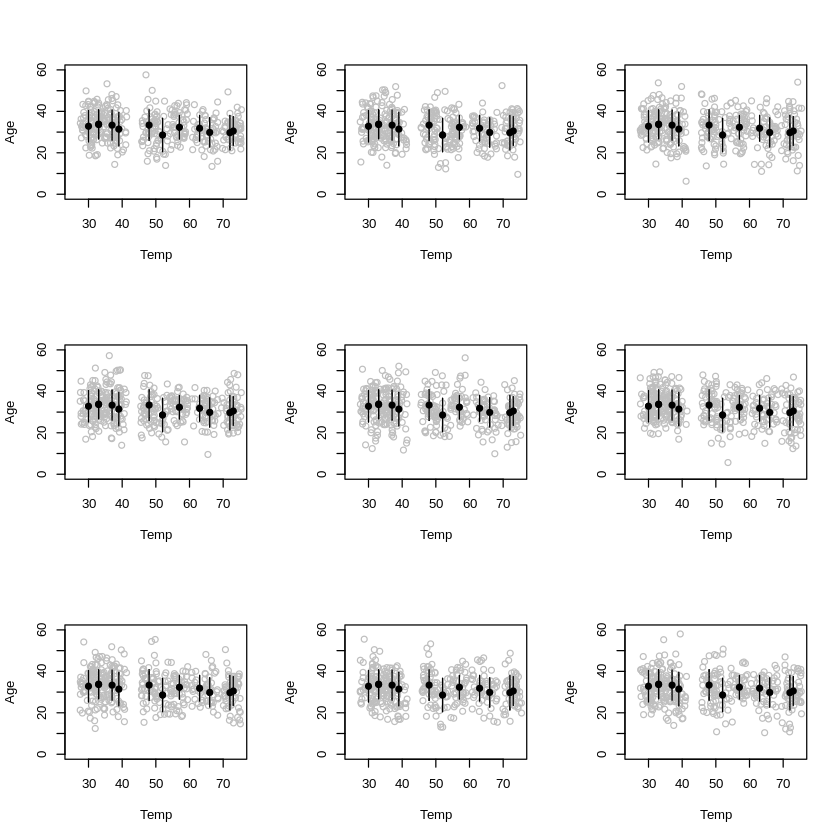

In [ ]:
par(mfrow=c(3,3))

for(i in 1:9){
  sim_dat <- list()
  for(r in 1:nrow(d)){
    sim_dat[[r]] <- rnorm(n=d[r, "SampleSize"], mean=d[r, "Age"], sd=d[r, "SD"])
  }
  plot(Age ~ Temp, data=d, ylim=c(0, 60), xlim=c(25, 75), pch=19)
  segments(x0=d$Temp, y0=d$Age+(d$SD), x1=d$Temp, y1=d$Age-(d$SD), col="black")
  for(r in 1:length(sim_dat)){
    temp_values <- rep(d[r, "Temp"], length(sim_dat[[r]]))
    jittered_temp <- jitter(temp_values, amount = 2.5)
    points(sim_dat[[r]] ~ jittered_temp, col="grey")
  }
  points(d$Temp, d$Age, pch=19)
  segments(x0=d$Temp, y0=d$Age+(d$SD), x1=d$Temp, y1=d$Age-(d$SD), col="black")
}

It's a little hard to say what assumptions aren't met for normal, non-weighted regression.  I suppose the sought answer is that the the variance of `Age` differs for different values of `Temp`, though the difference may not be very relevant.  This is especially evident when comparing the simulated data sets.  Nevertheless, we can mitigate whatever problem this violation causes with a weighted regression--weighting on the variance of `Age` across each `Temp`.

#### Answers to 2.16, 3-8
***3. Fit a weighted linear regression model to the data, and interpret the regression coefficients.***

***4. Formally test the hypothesis proposed by the researchers.***

***5. Find a 90% confidence interval for the slope of the fitted line, and interpret.***

***6. Fit the unweighted regression model, then plot both regression lines on a plot of the data. Comment on the differences.***

***7. Compute the 95% confidence intervals for the fitted values from the weighted regression line, and also plot these.***

***8. Interpret the model.***

Let's run a few regressions: without weighting, weighting on `SD`, and weighting on `SampleSize`.

In [ ]:
m <- lm(Age ~ Temp, data=d)
round(summary(m)$coef,4)
(m_confint <- round(confint(m, level=0.95)["Temp",],4))

m_wtd1 <- lm(Age ~ Temp, weights=SD, data=d)
round(summary(m_wtd1)$coef,4)
(m_wtd1_confint <- round(confint(m_wtd1, level=0.95)["Temp",],4))

m_wtd2 <- lm(Age ~ Temp, weights=SampleSize, data=d)
round(summary(m_wtd2)$coef,4)
(m_wtd2_confint <- round(confint(m_wtd2, level=0.95)["Temp",],4))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),35.6781,1.3175,27.0796,0.0000
Temp,-0.0777,0.0251,-3.0971,0.0113


2.5 %  97.5 % 
-0.1337 -0.0218

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),35.6453,1.3379,26.6424,0.0000
Temp,-0.0787,0.0256,-3.0803,0.0116


2.5 %  97.5 % 
-0.1356 -0.0218

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),35.7025,1.2600,28.3346,0.0000
Temp,-0.0756,0.0245,-3.0812,0.0116


2.5 %  97.5 % 
-0.1303 -0.0209

The results are pretty similar across models: `Temp` significantly (to level 0.05) associates with a reduction in `Age`, which supports the researchers' hypothesis.  The significance is reflected in the fact that the 95% CI are completely negative (notice I used 95% CI instead of 90% to make this point).

Let's plot these models.

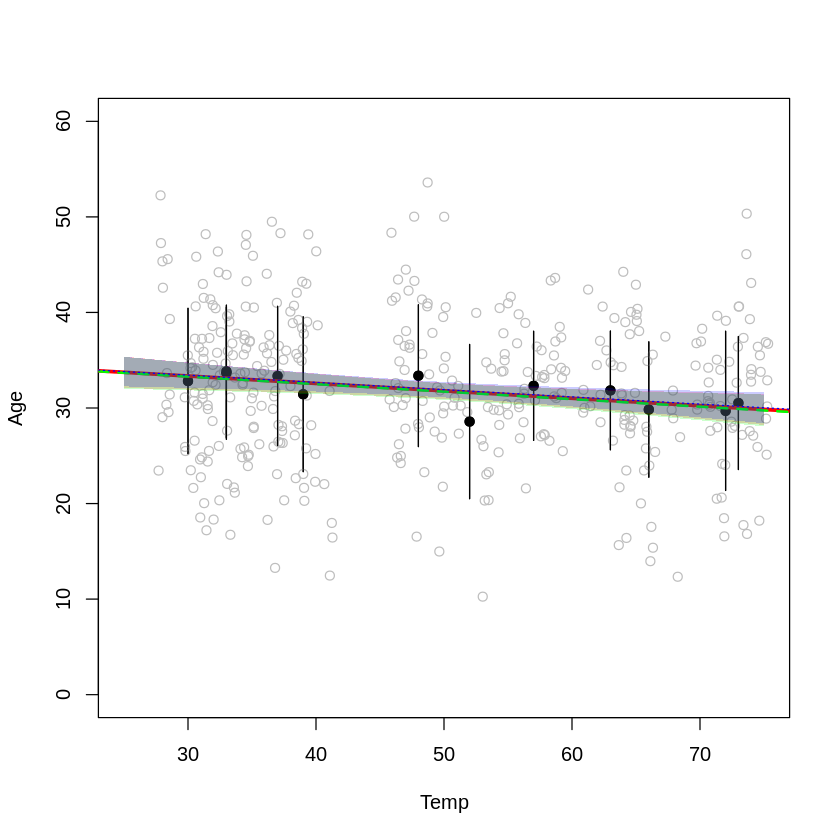

In [ ]:
new_data <- data.frame(Temp = seq(25, 75, length.out = 100))
predictions_m <- predict(m, newdata = new_data, interval = "confidence", type="response", level = 0.95)
predictions_m_wtd1 <- predict(m_wtd1, newdata = new_data, interval = "confidence", type="response", level = 0.95)
predictions_m_wtd2 <- predict(m_wtd2, newdata = new_data, interval = "confidence", type="response", level = 0.95)


par(mfrow=c(1,1))

for(i in 1:1){
  sim_dat <- list()
  for(r in 1:nrow(d)){
    sim_dat[[r]] <- rnorm(n=d[r, "SampleSize"], mean=d[r, "Age"], sd=d[r, "SD"])
  }
  plot(Age ~ Temp, data=d, ylim=c(0, 60), xlim=c(25, 75), pch=19)
  segments(x0=d$Temp, y0=d$Age+(d$SD), x1=d$Temp, y1=d$Age-(d$SD), col="black")
  for(r in 1:length(sim_dat)){
    temp_values <- rep(d[r, "Temp"], length(sim_dat[[r]]))
    jittered_temp <- jitter(temp_values, amount = 2.5)
    points(sim_dat[[r]] ~ jittered_temp, col="grey")
  }
  points(d$Temp, d$Age, pch=19)
  segments(x0=d$Temp, y0=d$Age+(d$SD), x1=d$Temp, y1=d$Age-(d$SD), col="black")

  abline(m, col="red", lty=1, lwd=3)
  polygon(c(new_data$Temp, rev(new_data$Temp)),
          c(predictions_m[, "lwr"], rev(predictions_m[, "upr"])),
          col = rgb(1, 0, 0, 0.2), border = NA)

  abline(m_wtd1, col="green", lty=2, lwd=2)
  polygon(c(new_data$Temp, rev(new_data$Temp)),
          c(predictions_m_wtd1[, "lwr"], rev(predictions_m_wtd1[, "upr"])),
          col = rgb(0, 1, 0, 0.2), border = NA)

  abline(m_wtd2, col="blue", lty=3, lwd=1)
  polygon(c(new_data$Temp, rev(new_data$Temp)),
          c(predictions_m_wtd2[, "lwr"], rev(predictions_m_wtd2[, "upr"])),
          col = rgb(0, 0, 1, 0.2), border = NA)
}

## Question 2.17
For a sample of 64 grazing Merino castrated male sheep (wethers) [5, 14, 17], the daily energy requirements and weight was recorded (Table 2.11; data set: `sheep`).

\

**Table 2.11** *The energy requirements (in Mcal/day) and weight (in kg) for a sample of 64 Merino wethers*

| Weight | Energy | Weight | Energy | Weight | Energy | Weight | Energy | Weight | Energy | Weight | Energy |
|-------------|--------------------|-------------|--------------------|-------------|--------------------|-------------|--------------------|-------------|--------------------|-------------|--------------------|
| 22.1        | 1.31               | 25.1        | 1.00               | 25.7        | 1.20               | 25.9        | 1.36               | 26.2        | 1.27               | 27.0        | 1.41               |
| 27.0        | 1.46               | 30.0        | 1.23               | 30.2        | 1.01               | 30.6        | 1.12               | 33.2        | 1.25               | 33.2        | 1.32               |
| 33.2        | 1.47               | 33.9        | 1.03               | 33.8        | 1.46               | 34.3        | 1.14               | 34.9        | 1.00               | 42.6        | 1.81               |
| 43.7        | 1.73               | 44.9        | 1.93               | 49.0        | 1.78               | 49.2        | 2.53               | 51.8        | 1.87               | 51.8        | 1.92               |
| 52.5        | 1.65               | 52.6        | 1.70               | 53.3        | 2.22               | 51.8        | 1.46               | 53.3        | 1.26               | 27.6        | 1.39               |
| 28.4        | 1.27               | 28.9        | 1.74               | 29.3        | 1.54               | 29.7        | 1.44               | 31.0        | 1.47               | 31.9        | 1.50               |
| 32.0        | 1.34               | 32.6        | 1.75               | 33.1        | 1.46               | 34.2        | 1.59               | 44.4        | 3.33               | 44.6        | 2.25               |
| 52.1        | 2.67               | 52.4        | 2.28               | 52.7        | 3.15               | 53.1        | 2.73               | 52.6        | 3.73               | 46.7        | 2.21               |
| 31.8        | 1.39               | 36.1        | 1.79               | 28.6        | 2.13               | 29.2        | 1.80               | 26.2        | 1.05               | 45.9        | 2.36               |
| 36.8        | 2.31               | 34.4        | 1.85               | 34.4        | 1.63               | 26.4        | 1.27               | 27.5        | 0.94               |

\

1. Fit a linear regression model to model the daily energy requirement from the weight.
2. Plot the data, plus the systematic component of the fitted model and the 95% confidence intervals about the fitted values.
3. Interpret the model.
4. Which assumptions, if any, appear to be violated? Explain.

(This problem continues in Problem 3.17.)

### Answers
First we need to load the data.

In [ ]:
install.packages("GLMsData")
library(GLMsData)

data(sheep)
d <- sheep
head(d)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



,Weight,Energy
,<dbl>,<dbl>
1,22.1,1.31
2,26.2,1.27
3,33.2,1.25
4,34.3,1.14
5,49.0,1.78
6,52.6,1.70



Call:
lm(formula = Energy ~ Weight, data = d)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.76227 -0.22099  0.00156  0.21907  1.31339 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.132941   0.180436   0.737    0.464    
Weight      0.043416   0.004857   8.939 9.45e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3662 on 62 degrees of freedom
Multiple R-squared:  0.5631,	Adjusted R-squared:  0.5561 
F-statistic: 79.91 on 1 and 62 DF,  p-value: 9.447e-13


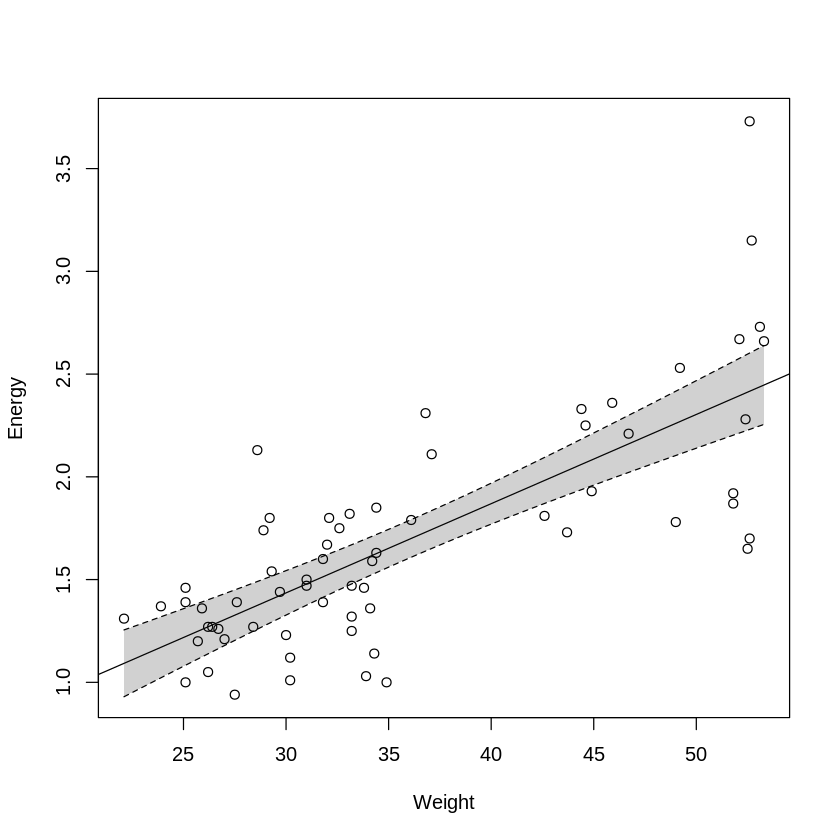

In [ ]:
m <- lm(Energy ~ Weight, d)
m_confint <- confint(m, level=0.95)

Weight_seq <- data.frame(Weight = seq(from=min(d$Weight), to=max(d$Weight), length.out=length(d$Weight)))
predictions_m <- predict(m, newdata=Weight_seq, interval = "confidence", type="response", level = 0.95)

plot(Energy ~ Weight, d)
abline(m, col="black", lty=1, lwd=1)
lines(predictions_m[,"upr"] ~ Weight_seq$Weight, lty=2)
lines(predictions_m[,"lwr"] ~ Weight_seq$Weight, lty=2)
polygon(c(Weight_seq$Weight, rev(Weight_seq$Weight)),
        c(predictions_m[,"lwr"], rev(predictions_m[,"upr"])),
        col = rgb(0.1, 0.1, 0.1, 0.2), border = NA)

summary(m)

In general, there is a significant increase in `Energy` associated with increases in `Weight` (~ Mcal/day per kg).  However, there seems to be heterogeneous variance across `Weight`.

I wonder if we can do better with a log transformation.


Call:
lm(formula = log(Energy) ~ Weight, data = d)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.45609 -0.13072  0.02761  0.12537  0.44848 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.366236   0.098997  -3.699 0.000461 ***
Weight       0.023562   0.002665   8.842 1.39e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2009 on 62 degrees of freedom
Multiple R-squared:  0.5577,	Adjusted R-squared:  0.5506 
F-statistic: 78.19 on 1 and 62 DF,  p-value: 1.386e-12


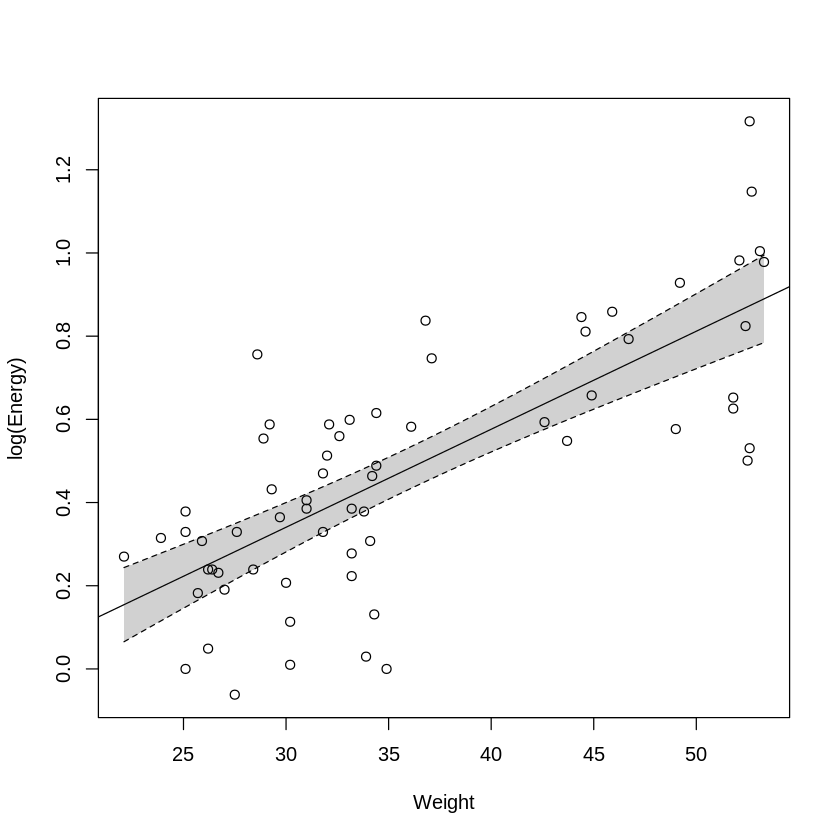

In [ ]:
m2 <- lm(log(Energy) ~ Weight, d)
m_confint2 <- confint(m2, level=0.95)

Weight_seq <- data.frame(Weight = seq(from=min(d$Weight), to=max(d$Weight), length.out=length(d$Weight)))
predictions_m2 <- predict(m2, newdata=Weight_seq, interval = "confidence", type="response", level = 0.95)

plot(log(Energy) ~ Weight, d)
abline(m2, col="black", lty=1, lwd=1)
lines(predictions_m2[,"upr"] ~ Weight_seq$Weight, lty=2)
lines(predictions_m2[,"lwr"] ~ Weight_seq$Weight, lty=2)
polygon(c(Weight_seq$Weight, rev(Weight_seq$Weight)),
        c(predictions_m2[,"lwr"], rev(predictions_m2[,"upr"])),
        col = rgb(0.1, 0.1, 0.1, 0.2), border = NA)

summary(m2)

That might be a little better.

## Question 2.18

Children were asked to build towers out of cubical and cylindrical blocks as high as they could [8, 12], and the number of blocks used and the time taken were recorded (Table 2.12; data set: `blocks`). In this Problem, we focus on the time taken to build the towers. (The number of blocks used to build towers is studied in Problem 10.19.)

**Table 2.12** The time taken (in s), and the number of blocks used, to build towers out of two shapes of blocks in two trials one month apart. The children’s ages are given in decimal years (converted from years and months). The results for the first five children are shown (Prob. 2.18)

(Page 89).

| Child | Age  | Trial 1 Cubes |      | Trial 1 Cylinders |      | Trial 2 Cubes |      | Trial 2 Cylinders |      |
|-------|------|---------------|------|-------------------|------|---------------|------|-------------------|------|
|       |      | Number        | Time | Number            | Time | Number        | Time | Number            | Time |
| A     | 4.67 | 11            | 30.0 | 6                 | 30.0 | 10            | 35.0 | 8                 | 125.0|
| B     | 5.00 | 9             | 19.0 | 4                 | 6.0  | 10            | 28.0 | 5                 | 14.4 |
| C     | 4.42 | 8             | 18.6 | 5                 | 14.2 | 7             | 18.0 | 5                 | 24.0 |
| D     | 4.33 | 9             | 23.0 | 4                 | 8.2  | 11            | 34.8 | 6                 | 14.4 |
| E     | 4.33 | 10            | 29.0 | 6                 | 14.0 | 6             | 16.2 | 5                 | 15.0 |
| ...   | ...  | ...           | ...  | ...               | ...  | ...           | ...  | ...               | ...  |


1. The data were originally examined in Problem 1.9 (p. 28). Using these plots, summarize the possible relationships of the explanatory variables with the time taken. Which assumptions, if any, appear to be violated?
2. Suppose a model with the systematic component `Time ~ Age * Shape` was needed to model the data. What would such a systematic component imply about the relationship between the variables?
3. Suppose a model with the systematic component `Time ~ Age * Trial` was needed to model the data. What would such a systematic component imply about the relationship between the variables?
4. Suppose a model with the systematic component `Time ~ (Age + Shape) * Trial` was needed to model the data. What would such a systematic component imply about the relationship between the variables?
5. One hypothesis of interest is whether the time taken to build the tower differs between cubical and cylindrical shaped blocks. Test this hypothesis by fitting a linear regression model.
6. Another hypothesis of interest is that older children take less time to build the towers than younger children, but the difference would depend on the type of block. Test this hypothesis.
7. Find a suitable linear regression model for the time taken to build the towers. Do you think this model is suitable? Explain.
8. Interpret your final model.

(This problem continues in Problem 3.16.)

### Answers

In [ ]:
#install.packages("GLMsData")
#library(GLMsData)

data(blocks)
d <- blocks
head(d)

,Child,Number,Time,Trial,Shape,Age
,<fct>,<int>,<dbl>,<int>,<fct>,<dbl>
1,A,11,30.0,1,Cube,4.67
2,B,9,19.0,1,Cube,5.00
3,C,8,18.6,1,Cube,4.42
4,D,9,23.0,1,Cube,4.33
5,E,10,29.0,1,Cube,4.33
6,F,13,178.0,1,Cube,4.83


#### Answer to Question 2.18, 1
***The data were originally examined in Problem 1.9 (p. 28). Using these plots, summarize the possible relationships of the explanatory variables with the time taken. Which assumptions, if any, appear to be violated?***

I'm going to reproduce my code from Problem 1.9.

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


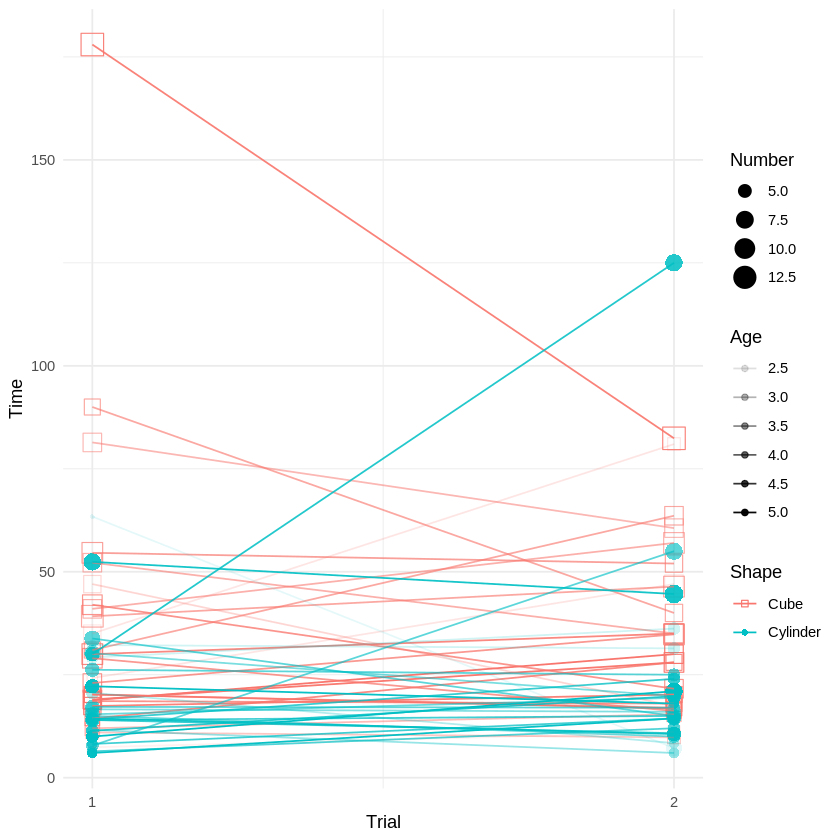

In [ ]:
# 2. Produce plots to examine the relationship between the  time taken to build towers, and the block  type ,  trial number , and  age.
library(ggplot2)

ggplot(d, aes(x=Trial, y=Time, size=Number, color=Shape, alpha=Age, shape=Shape, group=interaction(Child,Shape))) +
       geom_point() +
       geom_line(size=0.5) +
       labs(x="Trial", y="Time") +
       scale_shape_manual(values = c("Cube" = 0, "Cylinder" = 16)) +
       scale_x_continuous(breaks = c(1, 2)) +
       theme_minimal()

# Not the prettiest.  Would probably want to partition these variables out a bit.  But this is pretty cool.

# 3. In words, summarize the relationship between the four variables.
# It's not easy to see many trends here.
# Going from trial 1 to 2, most children seem to be spending about the same
  # amount of time and using about the same number of blocks.
# Child  seems to be a major determinant.

#### Answers to Questions 2.18, 2-4

***Suppose a model with the systematic components***

> ***2. `Time ~ Age * Shape`***

> ***3. `Time ~ Age * Trial`***

> ***4. `Time ~ (Age + Shape) * Trial`***

***was needed to model the data. What would such a systematic component imply about the relationship between the variables?***

2. `Time` can be modeled as $\beta_{Age} \times Age + \beta_{Shape} \times Shape + \beta_{Age \times Shape} \times Age \times Shape$
3. `Time` can be modeled as $\beta_{Age} \times Age + \beta_{Trial} \times Trial + \beta_{Age \times Trial} \times Age \times Trial$
4. `Time` can be modeled as $\beta_{Age} \times Age + \beta_{Shape} \times Shape + \beta_{Trial} \times Trial + \beta_{Age \times Shape} \times Age \times Shape + \beta_{Age \times Trial} \times Age \times Trial$

#### Answer to Questions 2.18, 5 and 6
***One hypothesis of interest is whether the time taken to build the tower differs between cubical and cylindrical shaped blocks. Test this hypothesis by fitting a linear regression model.***

***Another hypothesis of interest is that older children take less time to build the towers than younger children, but the difference would depend on the type of block. Test this hypothesis.***


Call:
lm(formula = Time ~ Shape, data = d)

Residuals:
    Min      1Q  Median      3Q     Max 
-29.416 -14.268  -6.816   7.032 141.184 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)     36.816      3.496  10.531  < 2e-16 ***
ShapeCylinder  -14.448      4.944  -2.922  0.00431 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 24.72 on 98 degrees of freedom
Multiple R-squared:  0.08015,	Adjusted R-squared:  0.07077 
F-statistic:  8.54 on 1 and 98 DF,  p-value: 0.004315



Call:
lm(formula = Time ~ Age * Shape, data = d)

Residuals:
    Min      1Q  Median      3Q     Max 
-26.402 -14.719  -6.973   5.878 139.676 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)
(Intercept)         29.262     19.487   1.502    0.136
Age                  1.876      4.760   0.394    0.694
ShapeCylinder       -2.513     27.559  -0.091    0.928
Age:ShapeCylinder   -2.964      6.731  -0.440    0.661

Residual standard error: 24.95 on 96 degrees of freedom
Multiple R-squared:  0.08214,	Adjusted R-squared:  0.05346 
F-statistic: 2.864 on 3 and 96 DF,  p-value: 0.04074


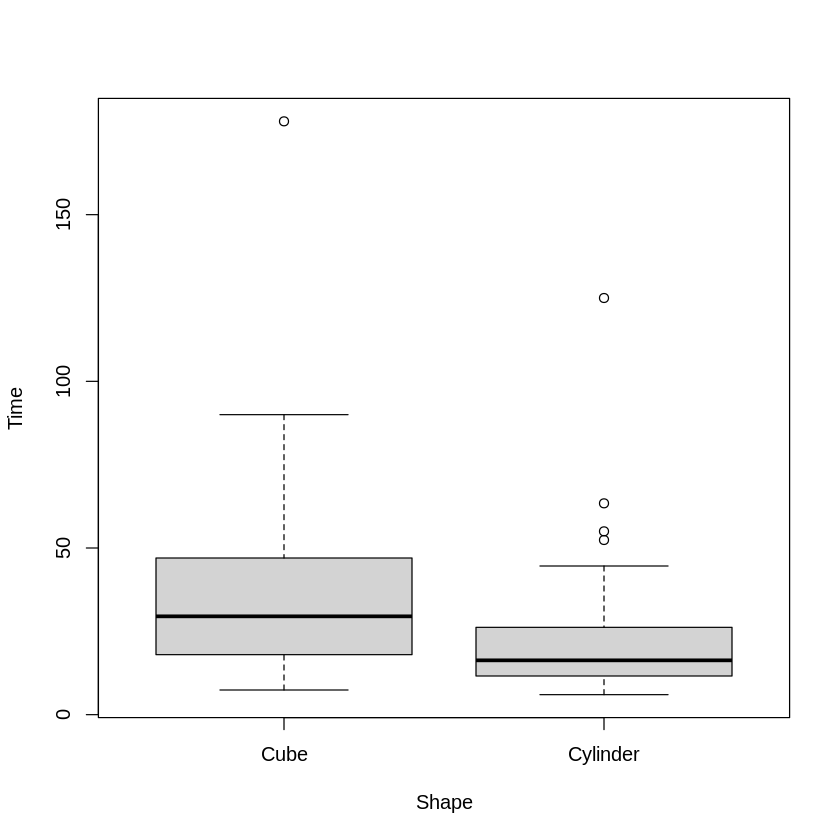

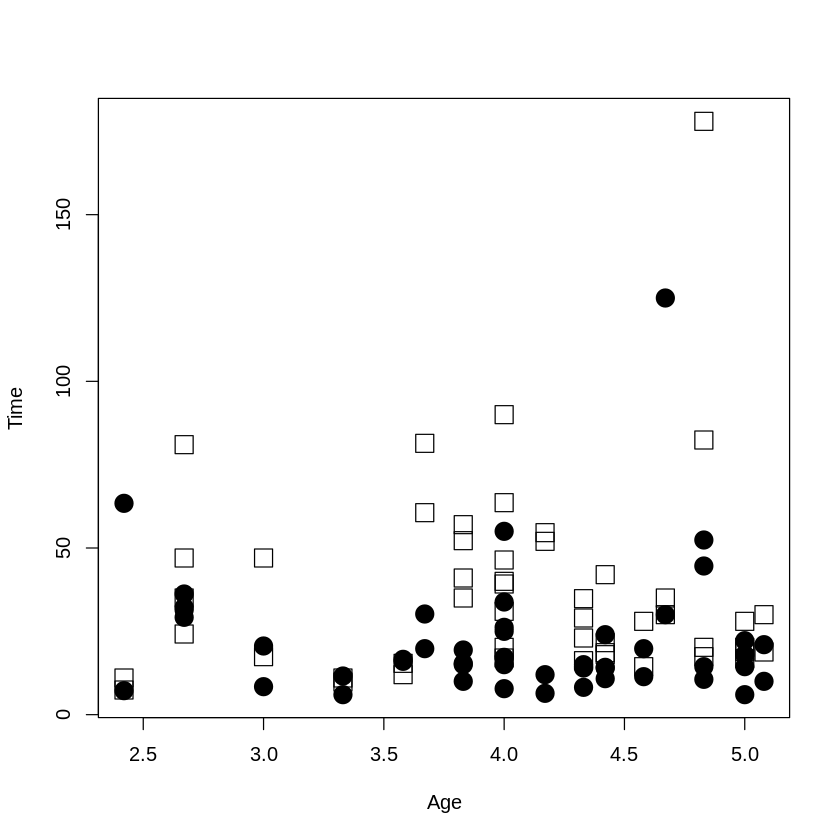

In [ ]:
m_shape <- lm(Time ~ Shape, d)
summary(m_shape)
plot(Time ~ Shape, d)

m_age.shape <- lm(Time ~ Age*Shape, d)
summary(m_age.shape)
plot(Time ~ Age, d,
     pch=ifelse(d$Shape=="Cylinder", 19, 0),
     cex=2)

In `m_Shape`, the hypothesis that `Shape` matters is supported.  However, in `m_age.shape`, neither main effect nor their interaction is supported as being meaningful.

#### Answer to Questions 2.18, 7 and 8

***Find a suitable linear regression model for the time taken to build the towers. Do you think this model is suitable? Explain.***

***Interpret your final model.***

In [ ]:
my_m1 <- lm(Time ~ Trial + Age + Shape, d)
summary(my_m1)


Call:
lm(formula = Time ~ Trial + Age + Shape, data = d)

Residuals:
    Min      1Q  Median      3Q     Max 
-28.771 -14.343  -6.968   7.382 140.879 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept)    35.1931    15.8945   2.214  0.02918 * 
Trial           0.0240     4.9950   0.005  0.99618   
Age             0.3941     3.3691   0.117  0.90712   
ShapeCylinder -14.4480     4.9950  -2.892  0.00473 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 24.98 on 96 degrees of freedom
Multiple R-squared:  0.08029,	Adjusted R-squared:  0.05154 
F-statistic: 2.793 on 3 and 96 DF,  p-value: 0.04447


I don't like these types of questions; hypothesis ought generally be sorted out a priori based on subject-matter knowledge.  The type of thinking alluded to here suggests *hunting* for p-values and adopting post-hoc hypotheses as though the are a priori.

Having said, that, I can image that `Shape`, `Age`, and `Trial` are all important determinants of `Time`.  Here, after accounting for each of these, only `Shape` is significantly important.

One factor that has not yet been discussed, though, is `Number` of blocks.  I bet this is important, let's put it into the model.

In [ ]:
my_m2 <- lm(Time ~ Trial + Age + Shape + Number, d)
summary(my_m2)


Call:
lm(formula = Time ~ Trial + Age + Shape + Number, data = d)

Residuals:
    Min      1Q  Median      3Q     Max 
-38.989  -9.623  -4.119   3.390 106.230 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.6383    14.3526   0.044   0.9646    
Trial          -1.3057     4.1905  -0.312   0.7560    
Age            -7.3713     3.0684  -2.402   0.0182 *  
ShapeCylinder   7.8250     5.4228   1.443   0.1523    
Number          8.3108     1.2866   6.460 4.45e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 20.93 on 95 degrees of freedom
Multiple R-squared:  0.361,	Adjusted R-squared:  0.3341 
F-statistic: 13.42 on 4 and 95 DF,  p-value: 1.05e-08


Now `Shape` is no longer "important" while `Number` and `Age` *are*.  This highlights the problem of approaching a statistical analysis without an a priori hypothesis.

## Question 2.19

The data in Table 2.13 (data set: `sharpener`) comes from a study to make a point.

\

**Table 2.13** The `sharpener` data; the first five cases are shown (Problem 2.13)


|   y   |  x1  |  x2  |  x3  |  x4  |  x5  |  x6  |  x7  |  x8  |  x9  |  x10 |
|-------|------|------|------|------|------|------|------|------|------|------|
|  9.87 | 0.64 | 0.22 | 0.83 | 0.41 | 0.64 | 0.88 | 0.22 | 0.41 | 0.38 | 0.02 |
|  8.86 | 0.16 | 0.55 | 0.71 | 0.25 | 0.61 | 0.68 | 0.93 | 0.95 | 0.15 | 0.00 |
|  7.82 | 0.14 | 0.00 | 0.97 | 0.54 | 0.25 | 0.46 | 0.71 | 0.90 | 0.13 | 0.18 |
| 10.77 | 0.53 | 0.45 | 0.80 | 0.54 | 0.84 | 0.39 | 0.16 | 0.06 | 0.72 | 0.90 |
|  9.53 | 0.14 | 0.52 | 0.13 | 0.91 | 0.15 | 0.52 | 0.09 | 0.26 | 0.12 | 0.51 |
|   ... |  ... |  ... |  ... |  ... |  ... |  ... |  ... |  ... |  ... |  ... |

\

1. Using the forward regression procedure (Sect. 2.12.2, p. 73), find a suitable linear regression (without interactions) model for predicting $y$ from the explanatory variables, based on using the AIC.
2. Using the backward elimination procedure, find a model (without interactions) for predicting $y$ from the explanatory variables based on using the AIC.
3. Using the step-wise regression procedure, find a model (without interactions) for predicting $y$ from the explanatory variables, based on using the AIC.
4. From the results of the above approaches, deduce a model (without interactions) for the data.
5. Repeat the three procedures, but use the BIC to select a model.
6. After reading the `R` help for the `sharpener` data (using `?sharpener`), comment on the use of automatic methods for fitting regression models.

### Answers

In [ ]:
install.packages("GLMsData")
library(GLMsData)

data(sharpener)
d <- sharpener
head(d)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,9.87,0.64,0.22,0.83,0.41,0.64,0.88,0.22,0.41,0.38,0.02
2,8.86,0.16,0.55,0.71,0.25,0.61,0.68,0.93,0.95,0.15,0.00
3,7.82,0.14,0.00,0.97,0.54,0.25,0.46,0.71,0.90,0.13,0.18
4,10.77,0.53,0.45,0.80,0.54,0.84,0.39,0.16,0.06,0.72,0.90
5,9.53,0.14,0.52,0.13,0.91,0.15,0.52,0.09,0.26,0.12,0.51
6,9.60,0.27,0.83,0.22,0.93,0.53,0.58,0.69,0.41,0.85,0.13


#### Answer to Question 2.19, 1

***Using the forward regression procedure (Sect. 2.12.2, p. 73), find a suitable linear regression (without interactions) model for predicting $y$ from the explanatory variables, based on using the AIC.***



In [ ]:
min.model <- lm(Y ~ 1, data=d)
mid.model <- lm(Y ~ X1 + X2 + X3 + X4 + X5, data=d)
max.model <- lm(Y ~ ., data=d)

auto.forward <- step(min.model, direction="forward", scope=list(lower=min.model, upper=max.model), k=2)

Start:  AIC=0.1
Y ~ 1

       Df Sum of Sq     RSS      AIC
+ X10   1    8.0594  5.1597 -12.0077
+ X1    1    1.7339 11.4851  -0.0050
<none>              13.2190   0.1041
+ X3    1    0.7589 12.4601   1.2172
+ X6    1    0.7444 12.4746   1.2347
+ X8    1    0.6632 12.5558   1.3320
+ X7    1    0.5118 12.7072   1.5118
+ X5    1    0.4365 12.7826   1.6005
+ X2    1    0.3195 12.8995   1.7371
+ X9    1    0.3060 12.9131   1.7529
+ X4    1    0.1909 13.0281   1.8859

Step:  AIC=-12.01
Y ~ X10

       Df Sum of Sq    RSS     AIC
+ X5    1   0.97157 4.1881 -13.137
<none>              5.1597 -12.008
+ X1    1   0.45453 4.7051 -11.391
+ X9    1   0.29792 4.8617 -10.900
+ X8    1   0.14097 5.0187 -10.423
+ X3    1   0.11072 5.0489 -10.333
+ X4    1   0.08263 5.0770 -10.250
+ X7    1   0.03018 5.1295 -10.096
+ X2    1   0.01251 5.1472 -10.044
+ X6    1   0.00462 5.1550 -10.021

Step:  AIC=-13.14
Y ~ X10 + X5

       Df Sum of Sq    RSS     AIC
<none>              4.1881 -13.137
+ X7    1  0.2260

#### Answer to Question 2.19, 2

***Using the backward elimination procedure, find a model (without interactions) for predicting $y$ from the explanatory variables based on using the AIC.***

In [ ]:
auto.backward <- step(max.model, direction="backward", scope=list(lower=min.model, upper=max.model), k=2)

Start:  AIC=-9.96
Y ~ X1 + X2 + X3 + X4 + X5 + X6 + X7 + X8 + X9 + X10

       Df Sum of Sq    RSS      AIC
- X2    1    0.1478 1.9296 -10.7607
- X1    1    0.1567 1.9386 -10.6912
<none>              1.7819  -9.9558
- X4    1    0.2779 2.0598  -9.7817
- X5    1    0.4423 2.2241  -8.6303
- X9    1    0.4879 2.2698  -8.3255
- X3    1    0.9041 2.6859  -5.8002
- X6    1    1.4688 3.2507  -2.9377
- X8    1    1.6261 3.4079  -2.2291
- X7    1    1.8811 3.6630  -1.1467
- X10   1    6.9578 8.7397  11.8974

Step:  AIC=-10.76
Y ~ X1 + X3 + X4 + X5 + X6 + X7 + X8 + X9 + X10

       Df Sum of Sq    RSS      AIC
- X1    1    0.2147 2.1443 -11.1785
- X4    1    0.2462 2.1758 -10.9595
<none>              1.9296 -10.7607
- X9    1    0.4384 2.3681  -9.6896
- X5    1    0.5652 2.4948  -8.9075
- X3    1    0.7629 2.6926  -7.7632
- X6    1    1.3906 3.3202  -4.6204
- X8    1    1.6071 3.5367  -3.6728
- X7    1    1.8317 3.7614  -2.7490
- X10   1    6.8605 8.7901   9.9837

Step:  AIC=-11.18
Y ~ X3 + X4 +

#### Answer to Question 2.19, 3

***Using the step-wise regression procedure, find a model (without interactions) for predicting $y$ from the explanatory variables, based on using the AIC.***

In [ ]:
auto.both <- step(mid.model, direction="both", scope=list(lower=min.model, upper=max.model), k=2)

Start:  AIC=5.24
Y ~ X1 + X2 + X3 + X4 + X5

       Df Sum of Sq     RSS     AIC
+ X10   1    5.8203  3.7379 -6.8431
- X2    1    0.0008  9.5590  3.2414
- X5    1    0.1887  9.7468  3.5334
- X4    1    1.1621 10.7203  4.9613
<none>               9.5581  5.2402
- X3    1    1.4636 11.0218  5.3773
+ X8    1    0.7203  8.8378  6.0649
- X1    1    2.0249 11.5830  6.1224
+ X6    1    0.4731  9.0851  6.4787
+ X9    1    0.2705  9.2876  6.8094
+ X7    1    0.0261  9.5321  7.1992

Step:  AIC=-6.84
Y ~ X1 + X2 + X3 + X4 + X5 + X10

       Df Sum of Sq    RSS     AIC
- X3    1    0.0540 3.7919 -8.6278
- X4    1    0.0581 3.7960 -8.6116
- X1    1    0.2431 3.9810 -7.8978
- X2    1    0.2550 3.9928 -7.8532
- X5    1    0.3355 4.0734 -7.5537
<none>              3.7379 -6.8431
+ X7    1    0.2535 3.4844 -5.8964
+ X9    1    0.0443 3.6936 -5.0219
+ X8    1    0.0433 3.6945 -5.0180
+ X6    1    0.0000 3.7378 -4.8433
- X10   1    5.8203 9.5581  5.2402

Step:  AIC=-8.63
Y ~ X1 + X2 + X4 + X5 + X10

    

#### Answer to Question 2.19, 4

***From the results of the above approaches, deduce a model (without interactions) for the data.***

In these runs, `Y ~ X5 + X10` seems to perform the best.

#### Answer to Question 2.19, 5

***Repeat the three procedures, but use the BIC to select a model.***

These commands have an argument called `k` which is the size of the penalty.  The default is 2, which is the penalty for AIC.  To get BIC, we need to change it to `k=log(n)`, which is the penalty for BIC.  This will give us the BIC, but it will still be called AIC in the output.

In [ ]:
(auto.forward2 <- step(min.model, direction="forward", scope=list(lower=min.model, upper=max.model), k=log(nrow(d))))

Start:  AIC=0.81
Y ~ 1

       Df Sum of Sq     RSS      AIC
+ X10   1    8.0594  5.1597 -10.5916
<none>              13.2190   0.8122
+ X1    1    1.7339 11.4851   1.4111
+ X3    1    0.7589 12.4601   2.6333
+ X6    1    0.7444 12.4746   2.6508
+ X8    1    0.6632 12.5558   2.7481
+ X7    1    0.5118 12.7072   2.9279
+ X5    1    0.4365 12.7826   3.0166
+ X2    1    0.3195 12.8995   3.1532
+ X9    1    0.3060 12.9131   3.1690
+ X4    1    0.1909 13.0281   3.3020

Step:  AIC=-10.59
Y ~ X10

       Df Sum of Sq    RSS      AIC
+ X5    1   0.97157 4.1881 -11.0129
<none>              5.1597 -10.5916
+ X1    1   0.45453 4.7051  -9.2668
+ X9    1   0.29792 4.8617  -8.7756
+ X8    1   0.14097 5.0187  -8.2991
+ X3    1   0.11072 5.0489  -8.2089
+ X4    1   0.08263 5.0770  -8.1257
+ X7    1   0.03018 5.1295  -7.9715
+ X2    1   0.01251 5.1472  -7.9199
+ X6    1   0.00462 5.1550  -7.8970

Step:  AIC=-11.01
Y ~ X10 + X5

       Df Sum of Sq    RSS      AIC
<none>              4.1881 -11.0129
+ X


Call:
lm(formula = Y ~ X10 + X5, data = d)

Coefficients:
(Intercept)          X10           X5  
     8.2808       2.2831       0.9932  


In [ ]:
(auto.backward2 <- step(max.model, direction="backward", scope=list(lower=min.model, upper=max.model), k=log(nrow(d))))

Start:  AIC=-2.17
Y ~ X1 + X2 + X3 + X4 + X5 + X6 + X7 + X8 + X9 + X10

       Df Sum of Sq    RSS     AIC
- X2    1    0.1478 1.9296 -3.6802
- X1    1    0.1567 1.9386 -3.6107
- X4    1    0.2779 2.0598 -2.7012
<none>              1.7819 -2.1673
- X5    1    0.4423 2.2241 -1.5498
- X9    1    0.4879 2.2698 -1.2450
- X3    1    0.9041 2.6859  1.2803
- X6    1    1.4688 3.2507  4.1428
- X8    1    1.6261 3.4079  4.8514
- X7    1    1.8811 3.6630  5.9338
- X10   1    6.9578 8.7397 18.9779

Step:  AIC=-3.68
Y ~ X1 + X3 + X4 + X5 + X6 + X7 + X8 + X9 + X10

       Df Sum of Sq    RSS     AIC
- X1    1    0.2147 2.1443 -4.8061
- X4    1    0.2462 2.1758 -4.5871
<none>              1.9296 -3.6802
- X9    1    0.4384 2.3681 -3.3172
- X5    1    0.5652 2.4948 -2.5351
- X3    1    0.7629 2.6926 -1.3907
- X6    1    1.3906 3.3202  1.7521
- X8    1    1.6071 3.5367  2.6996
- X7    1    1.8317 3.7614  3.6235
- X10   1    6.8605 8.7901 16.3561

Step:  AIC=-4.81
Y ~ X3 + X4 + X5 + X6 + X7 + X8 + X9 +


Call:
lm(formula = Y ~ X5 + X6 + X7 + X8 + X10, data = d)

Coefficients:
(Intercept)           X5           X6           X7           X8          X10  
      7.222        1.290        1.315        1.529       -1.350        2.867  


In [ ]:
(auto.both2 <- step(mid.model, direction="both", scope=list(lower=min.model, upper=max.model), k=log(nrow(d))))

Start:  AIC=9.49
Y ~ X1 + X2 + X3 + X4 + X5

       Df Sum of Sq     RSS     AIC
+ X10   1    5.8203  3.7379 -1.8867
- X2    1    0.0008  9.5590  6.7817
- X5    1    0.1887  9.7468  7.0736
- X4    1    1.1621 10.7203  8.5015
- X3    1    1.4636 11.0218  8.9176
<none>               9.5581  9.4885
- X1    1    2.0249 11.5830  9.6626
+ X8    1    0.7203  8.8378 11.0212
+ X6    1    0.4731  9.0851 11.4351
+ X9    1    0.2705  9.2876 11.7658
+ X7    1    0.0261  9.5321 12.1555

Step:  AIC=-1.89
Y ~ X1 + X2 + X3 + X4 + X5 + X10

       Df Sum of Sq    RSS     AIC
- X3    1    0.0540 3.7919 -4.3795
- X4    1    0.0581 3.7960 -4.3633
- X1    1    0.2431 3.9810 -3.6495
- X2    1    0.2550 3.9928 -3.6049
- X5    1    0.3355 4.0734 -3.3054
<none>              3.7379 -1.8867
+ X7    1    0.2535 3.4844 -0.2320
+ X9    1    0.0443 3.6936  0.6425
+ X8    1    0.0433 3.6945  0.6464
+ X6    1    0.0000 3.7378  0.8211
- X10   1    5.8203 9.5581  9.4885

Step:  AIC=-4.38
Y ~ X1 + X2 + X4 + X5 + X10

    


Call:
lm(formula = Y ~ X5 + X10, data = d)

Coefficients:
(Intercept)           X5          X10  
     8.2808       0.9932       2.2831  


#### Answer to Question 2.19, 6

***After reading the `R` help for the `sharpener` data (using `?sharpener`), comment on the use of automatic methods for fitting regression models.***

In [ ]:
?sharpener

Warning message in fetch(key):
“internal error 1 in R_decompress1 with libdeflate”
ERROR while rich displaying an object: Error in fetch(key): lazy-load database '/usr/local/lib/R/site-library/GLMsData/help/GLMsData.rdb' is corrupt

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_con

While these methods may be okay if the goal is prediction, they offer little to no mechanistic understanding of the system being modeled.